In [15]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
desire_size = (100, 100)
n_channels = 3
batch_size = 128
labels = list(map(lambda x: x.split("\\")[2], glob.glob("data\\train\\*\\*")))

# Obtener nombres de los archivos en "data/train/"
IDS = list(map(lambda x: x.split("\\")[3], glob.glob("data\\train\\*\\*")))
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
num_out = len(le.classes_)
pd.Series(labels).value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [17]:
print(IDS)

['0050f38b3.png', '0183fdf68.png', '0260cffa8.png', '05eedce4d.png', '075d004bc.png', '078eae073.png', '082314602.png', '0ace21089.png', '0b228a6b8.png', '0b3e7a7a9.png', '0bb75ded8.png', '0be707615.png', '0c67c3fc3.png', '0d1a9985f.png', '0d28c429b.png', '0d4f74f4a.png', '0dad57e7f.png', '0e91f92a1.png', '0fe440ed5.png', '1276dffba.png', '129c51855.png', '13a7f553a.png', '14719a83e.png', '1576ce9fd.png', '163c13912.png', '163e571a6.png', '16c69a6d8.png', '173cec485.png', '1a125880e.png', '1af1eddd3.png', '1d39b8f30.png', '1e49633e0.png', '20b2cbaed.png', '20d4fab57.png', '2269e0a1e.png', '228d8ad5c.png', '22be204a3.png', '25daae389.png', '260c4eed3.png', '26103af9c.png', '279ac215b.png', '28a707630.png', '2aa60045d.png', '2ed589264.png', '2ee4dad8c.png', '2f0ae1b34.png', '2f6bc240a.png', '3002e5d9d.png', '31958c132.png', '31f2766cb.png', '32d97b170.png', '332f68a21.png', '34a672a63.png', '355cad34c.png', '37d85d833.png', '39e9bf4c7.png', '3a8c485bc.png', '3b7266ac3.png', '3b7d1fe82.pn

Tiene 3 colores (196, 196, 3)


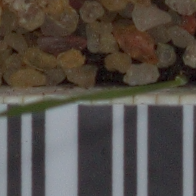

In [18]:
img_color = Image.open(glob.glob(f"data/train/*/{IDS[0]}")[0])
print(f"Tiene 3 colores {np.array(img_color).shape}")
img_color

Tiene 1 canal (196, 196)


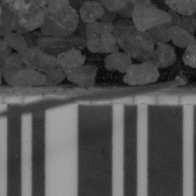

In [19]:
img_gris = img_color.convert('L')
print(f"Tiene 1 canal {np.array(img_gris).shape}")
img_gris

In [20]:
def plot_1_images(d,label, ax=None):
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(d)
    ax.set_title(label=label)
    return fig,ax

In [21]:
ls_size = []
X = []
y = []
for file in glob.glob("data\\train\\*\\*"):
    label = file.split("\\")[2]
    id_img = file.split("\\")[3]
    # gray scale para tener los 3 colores quite la L
    im = Image.open(file).convert('L')
    ls_size.append([im.size[0],im.size[1],label,id_img])
    img_resize = im.resize(desire_size)
    X.append(np.array(img_resize).flatten())
    y.append(label)

In [22]:
np.array(X).shape

(4750, 10000)

In [23]:
y_img = to_categorical(le.transform(y), dtype ="uint8")
X_img = np.reshape(np.array(X), (-1, desire_size[0], desire_size[1]))
X_train,X_test, y_train,y_test = train_test_split(X_img,y_img,test_size=0.2)

In [24]:
#Instantiate an empty model
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(desire_size[0],desire_size[1],1),

                 kernel_size=(1,1),padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# 4th Convolutional Layer
model.add(Conv2D(filters=160, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=190, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(3000, activation='relu'))
# Add Dropout
model.add(Dropout(0.3))
# 2nd Fully Connected Layer
model.add(Dense(2000, activation='relu'))
# Add Dropout
model.add(Dropout(0.2))
# 3rd Fully Connected Layer
model.add(Dense(150, activation='relu'))
# Add Dropout
model.add(Dropout(0.1))
# Output Layer
model.add(Dense(num_out, activation='softmax'))
model.summary()
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      64        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 96)        3168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 96)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 128)       110720    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 128)     

In [25]:
model.fit(X_train,y_train,  epochs=20, batch_size=200, validation_data=(X_test, y_test))

Epoch 1/20
19/19 [==============================] - 41s 2s/step - loss: 5.9132 - accuracy: 0.1087 - val_loss: 2.4602 - val_accuracy: 0.1063
Epoch 2/20
19/19 [==============================] - 36s 2s/step - loss: 2.4400 - accuracy: 0.1221 - val_loss: 2.4303 - val_accuracy: 0.1316
Epoch 3/20
19/19 [==============================] - 35s 2s/step - loss: 2.4267 - accuracy: 0.1355 - val_loss: 2.4140 - val_accuracy: 0.1600
Epoch 4/20
19/19 [==============================] - 35s 2s/step - loss: 2.4197 - accuracy: 0.1397 - val_loss: 2.4178 - val_accuracy: 0.1411
Epoch 5/20
19/19 [==============================] - 34s 2s/step - loss: 2.4125 - accuracy: 0.1316 - val_loss: 2.3926 - val_accuracy: 0.1400
Epoch 6/20
19/19 [==============================] - 34s 2s/step - loss: 2.3935 - accuracy: 0.1476 - val_loss: 2.4023 - val_accuracy: 0.1526
Epoch 7/20
19/19 [==============================] - 35s 2s/step - loss: 2.3859 - accuracy: 0.1542 - val_loss: 2.4089 - val_accuracy: 0.1305
Epoch 8/20
19/19 [==

KeyboardInterrupt: 

In [ ]:
X_oob = []
file_oob = []
for file in glob.glob("data\\test\\*"):
    im = Image.open(file).convert('L')
    img_resize = im.resize(desire_size)
    X_oob.append(np.array(img_resize).flatten())
    file_oob.append(file.split("\\")[2])

In [ ]:
#oob = Out Of Bag
X_oob_img = np.reshape(np.array(X_oob), (-1, desire_size[0], desire_size[1]))
y_hat = le.inverse_transform(np.argmax(model.predict(X_oob_img), axis=1))
df_oob = pd.DataFrame(data= zip(file_oob, y_hat),
                        columns=["file","species"])
df_oob.to_csv("data/prediction_cnnMMMMM.csv", index=False)

25/25 [==============================] - 2s 58ms/step


In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.718, Test: 0.399
